In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
%matplotlib inline

In [62]:
digits=load_digits()

In [63]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [64]:
def plot_image(data,target,img_shape=(8,8)):
    plt.figure(figsize=(20,5))
    for index,(image,label) in enumerate(zip(data[5:9],target[5:9])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image, img_shape))
        plt.title("Training %i\n" %label, fontsize=21)

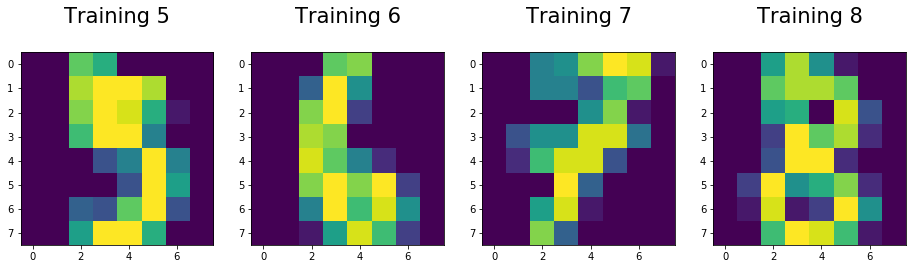

In [65]:
plot_image(digits.data,digits.target)

In [66]:
def plot_image(data,target,img_shape=(8,8)):
    plt.figure(figsize=(20,5))
    for index,(image,label) in enumerate(zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image, img_shape),cmap=plt.cm.gray)
        plt.title("Training %i\n" %label, fontsize=21)

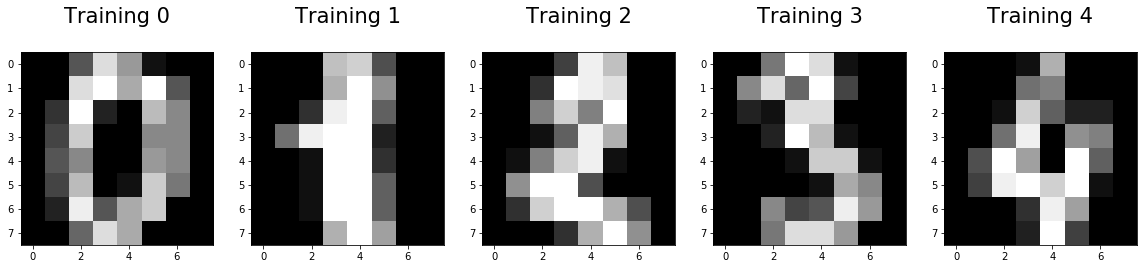

In [67]:
plot_image(digits.data,digits.target)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=.25)

In [69]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf=LogisticRegression()


In [72]:
clf.fit(x_train,y_train)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
model_pred=clf.predict(x_test)

In [74]:
acc=accuracy_score(model_pred,y_test)

In [75]:
acc

0.9511111111111111

In [76]:
confusion_matrix= confusion_matrix(model_pred,y_test)

In [83]:
confusion_matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  2,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 55,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  3,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 38,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 41,  1],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  1, 38]], dtype=int64)

In [96]:
def get_misclassified_data(model_pred,y_test):
    misclassifications=[]
    for index,(predicted,actual) in enumerate(zip(model_pred,y_test)):
         if predicted != actual:
            misclassifications.append(index)
    return misclassifications    

In [97]:
get_misclassified_data(model_pred,y_test)

[138,
 148,
 153,
 156,
 176,
 187,
 226,
 231,
 249,
 265,
 271,
 297,
 305,
 327,
 328,
 351,
 356,
 408,
 430,
 441,
 444,
 445]

In [110]:
def plot_misclassified(misclassifications, img_shape=(8,8)):
    plt.figure(figsize=(20,4))
    for index, wrong in enumerate(misclassifications[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],img_shape), cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual: {}".format(model_pred[wrong],y_test[wrong]))
        print(wrong)

In [111]:
misclassifications=get_misclassified_data(model_pred,y_test)

138
148
153
156
176


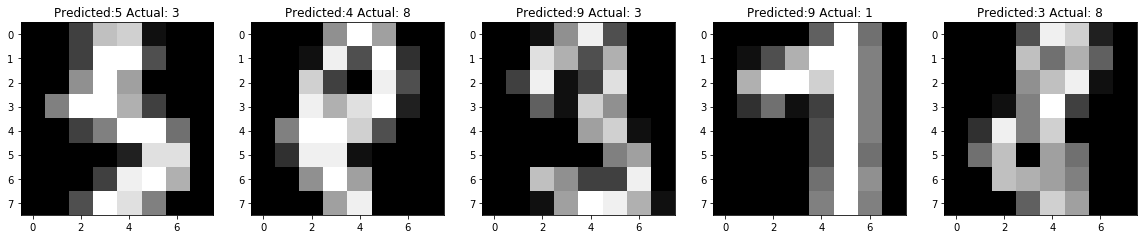

In [112]:
plot_misclassified(misclassifications)